<center><img src="http://www.evanmarie.com/content/files/notebook_images/name_popularity_banner.png" width = 900></center>

In [25]:
%%capture
!pip inatall matplotlib
!pip install pandas
from urllib.request import urlopen
from PIL import Image
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

## RUN THIS CELL FIRST:

In [26]:
df = pd.read_csv("http://www.evanmarie.com/content/files/apps/name_popularity/names_popularity_rank.csv")

---
## Run the `plot_name()` function in the cells below.
### You will be prompted for input

In [29]:
def plot_name():
    import matplotlib as mpl
    
    name = input("\n Enter a name: ").capitalize()
    gender = input(" Gender: Enter M for male or F for female: ").upper()
    color = input(" Choose a plot color: ").lower()
    
    print("")
    print(".........." * 5)
    print("Loading the data...")
    print("There are almost 2 million records...")
    print("So I will need to do some data wrangling...")
    print("Give me just a sec...\n")
    
    plt.style.use("ggplot");
    plt.figure(figsize=(10, 6), facecolor="#222222");
    mpl.rcParams['text.color'] = 'white'
    mpl.rcParams['axes.labelcolor'] = 'white'
    mpl.rcParams['xtick.color'] = 'white'
    mpl.rcParams['ytick.color'] = 'white'
    ax = plt.axes();
    
    try: 
        data = df[(df.name == name) & (df.gender == gender)].sort_values(by='year')
        data.popularity.plot(kind='bar', color=color);

        years = list(data.year)
        labels = []
        for idx, year in enumerate(years):
            if idx % 5 == 0:
                labels.append(year)

        if gender == "F":
            gender_label = "Females"
        else:
            gender_label = "Males"

        ax.set_xticks(ticks=range(0, len(data), 5), labels=labels, fontsize=10);
        ax.tick_params(labelrotation=40);
        ax.set_title(f"Popularity Distribution {gender_label} Named {name}", fontsize=16, pad=20);
        ax.set_ylabel("Popularity", fontsize=14);
        ax.set_xlabel("Years", fontsize=14);
        image = plt.savefig('plot.png', dpi=200)
        plt.savefig('plot.png', dpi=200)
        print("")
        print(".........." * 5)
        print("Your image has been saved to your computer.")
        print("See your name popularity graph below.")
        print(".........." * 5)
        print("")
        return image
    
    except IndexError:
        print(".........." * 5)
        print("OOOPS! Try again! Check your spelling maybe? If you are sure you")
        print("input a valid name, then keep in mind any names with fewer than 5 births")
        print("in a year are not included in the data.\n")
        print(".........." * 5)


 Enter a name:  evan
 Gender: Enter M for male or F for female:  f
 Choose a plot color:  purple



..................................................
Loading the data...
There are almost 2 million records...
So I will need to do some data wrangling...
Give me just a sec...


..................................................
Your image has been saved to your computer.
See your name popularity graph below.
..................................................



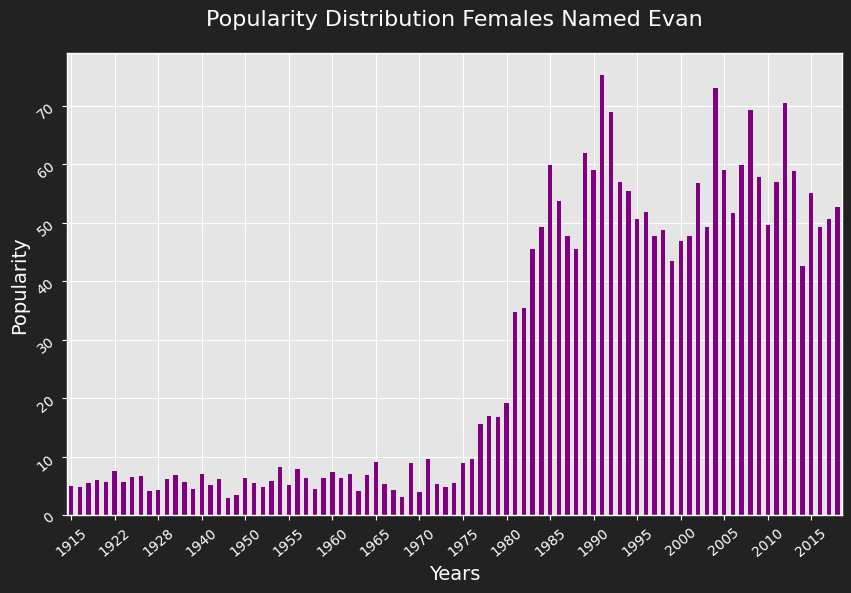

In [28]:
plot_name()


 Enter a name:  Chester
 Gender: Enter M for male or F for female:  F
 Choose a plot color:  Red



..................................................
Loading the data...
There are almost 2 million records...
So I will need to do some data wrangling...
Give me just a sec...


..................................................
Your image has been saved to your computer.
See your name popularity graph below.
..................................................



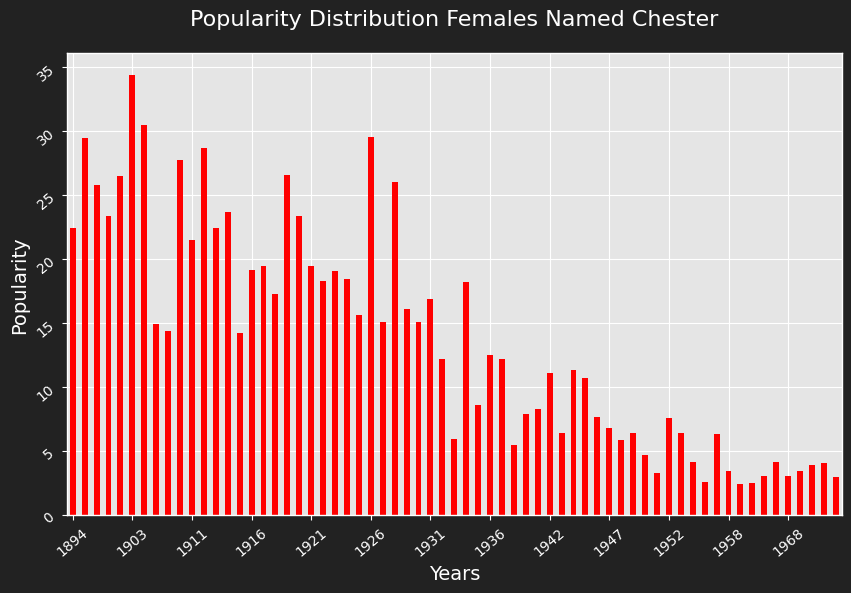

In [30]:
plot_name()

## Get the total number of individuals given a name:
### You can specify M for male, F for female, or "both"
### Just run the `how_many_ever()` cell below.
### You will be prompted for input.

In [65]:
def how_many_ever():
    %matplotlib inline
    
    print("")
    name = input("Input a name: ").capitalize()
    gender = input("Input M for male, F for female, or 'both': ").capitalize()
    
    if (gender == "F") or (gender == "M"):
        result = df[(df.name == name) & (df.gender == gender)].year_count.sum()
    elif (gender == None) or (gender == 'Both'):
        result = df[df.name == name].year_count.sum()
    if gender == "F":
        gen = "females"
    elif gender == "M":
        gen = "males"
    elif (gender == None) or (gender == "Both"):
        gen = "people"
        
    
    if result < 25:
        image = "http://www.evanmarie.com/content/files/apps/name_popularity/names_01.png"
        message = "Now, that is unique AF! NOICE!"
    elif result < 3000:
        image = "http://www.evanmarie.com/content/files/apps/name_popularity/names_02.png"
        message = "Wow, that's pretty rare. I like it!"
    elif result < 100000:
        image = "http://www.evanmarie.com/content/files/apps/name_popularity/names_03.png"
        message = "Unique enough, but still often able to find custom items with your name on it."
    elif result < 500000:    
        image = "http://www.evanmarie.com/content/files/apps/name_popularity/names_04.png"
        message = "Nice and popular but it's nice when half of your friends don't have the same name as you."
    elif result < 1000000:    
        image = "http://www.evanmarie.com/content/files/apps/name_popularity/names_05.png"
        message = "Not bad! Almost a Mary or a James!"
    else:
        image = "http://www.evanmarie.com/content/files/apps/name_popularity/names_06.png"
        message = "Is there such a thing as too popular? Really though?"
    
    print(f"\nThere have been a total of {result:,} {gen} named {name.upper()} in the USA between 1880 and 2018.")
    print(message, '\n')
    img = Image.open(urlopen(image))
    img = img.resize((200, 200))
    display(img)
    print("")

Input a name:  Evan
Input M for male, F for female, or 'both':  F



There have been a total of 4,212 females named EVAN in the USA between 1880 and 2018.
Unique enough, but still often able to find custom items with your name on it. 



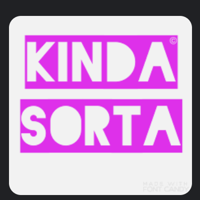

In [66]:
how_many_ever()

Input a name:  Dustin
Input M for male, F for female, or 'both':  M



There have been a total of 205,394 males named DUSTIN in the USA between 1880 and 2018.
Nice and popular but it's nice when half of your friends don't have the same name as you. 



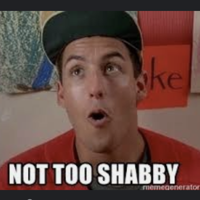

In [339]:
how_many_ever()

Input a name:  Emma
Input M for male, F for female, or 'both':  F



There have been a total of 672,893 females named EMMA in the USA between 1880 and 2018.
Not bad! Almost a Mary or a James! 



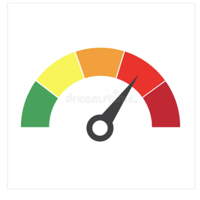

In [342]:
how_many_ever()

Input a name:  Mary
Input M for male, F for female, or 'both':  F



There have been a total of 4,125,675 females named MARY in the USA between 1880 and 2018.
Is there such a thing as too popular? Really though? 



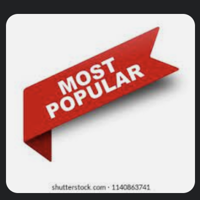

In [343]:
how_many_ever()

Input a name:  Chester
Input M for male, F for female, or 'both':  F



There have been a total of 828 females named CHESTER in the USA between 1880 and 2018.
Wow, that's pretty rare. I like it! 



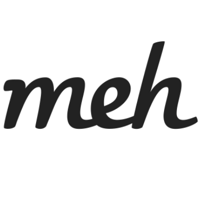

In [344]:
how_many_ever()

In [63]:
def how_many_ever():
    %matplotlib inline
    
    print("")
    name = input("Input a name: ").capitalize()
    gender = input("Input M for male, F for female, or 'both': ").capitalize()
    
    if (gender == "F") or (gender == "M"):
        result = df[(df.name == name) & (df.gender == gender)].year_count.sum()
    elif (gender == None) or (gender == 'Both'):
        result = df[df.name == name].year_count.sum()
    if gender == "F":
        gen = "females"
    elif gender == "M":
        gen = "males"
    elif (gender == None) or (gender == "Both"):
        gen = "people"
        
    
    if result < 25:
        image = "http://www.evanmarie.com/content/files/apps/name_popularity/names_01.png"
        message = "Now, that is unique AF! NOICE!"
    elif result < 3000:
        image = "http://www.evanmarie.com/content/files/apps/name_popularity/names_02.png"
        message = "Wow, that's pretty rare. I like it!"
    elif result < 100000:
        image = "http://www.evanmarie.com/content/files/apps/name_popularity/names_03.png"
        message = "Unique enough, but still often able to find custom items with your name on it."
    elif result < 750000:    
        image = "http://www.evanmarie.com/content/files/apps/name_popularity/names_04.png"
        message = "Nice and popular but it's nice when half of your friends don't have the same name as you."
    elif result < 1000000:    
        image = "http://www.evanmarie.com/content/files/apps/name_popularity/names_05.png"
        message = "Not bad! Almost a Mary or a James!"
    else:
        image = "http://www.evanmarie.com/content/files/apps/name_popularity/names_06.png"
        message = "Is there such a thing as too popular? Really though?"
    
    print(f"\nThere have been a total of {result:,} {gen} named {name.upper()} in the USA between 1880 and 2018.")
    print(message, '\n')
    img = Image.open(urlopen(image))
    img = img.resize((200, 200))
    display(img)
    print("")

Input a name:  Dustin
Input M for male, F for female, or 'both':  M



There have been a total of 205,394 males named DUSTIN in the USA between 1880 and 2018.
Nice and popular but it's nice when half of your friends don't have the same name as you. 



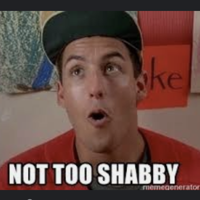

In [64]:
how_many_ever()